# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
def plot_performance_(r, num_agents=40):
    rewards = []
    for i in range(num_agents):
        indices = np.where(r[:,0]==i)
        rews = r[indices][:,2]
        rewards.append(rews) 
        
    min_reward = []
    avg_reward = []
    max_reward = []
    min_len = min([len(rewards[i]) for i in range(num_agents)])
    for j in range(min_len):
        min_reward.append(min([rewards[i][j] for i in range(num_agents)]))
        avg_reward.append(sum([rewards[i][j] for i in range(num_agents)]) / num_agents)
        max_reward.append(max([rewards[i][j] for i in range(num_agents)]))    
        
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.plot(min_reward)
    ax.plot(avg_reward)
    ax.plot(max_reward)
    ax.grid()
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(18)
    for (i, spine) in enumerate(plt.gca().spines.values()):
        if i%2 != 0: spine.set_visible(False)

In [64]:
def plot_performance(r, num_agents=40):
    rewards = []
    for i in range(num_agents):
        indices = np.where(r[:,0]==i)
        rews = r[indices][:,2]
        rewards.append(rews) 
        
    min_reward = []
    avg_reward = []
    max_reward = []
    max_len = max([len(rewards[i]) for i in range(num_agents)])
    for j in range(max_len):
        min_ = np.inf
        max_ = -np.inf
        avg_ = []
        for i in range(num_agents):
            if len(rewards[i]) > j:
                min_ = min(min_, rewards[i][j])
                max_ = max(max_, rewards[i][j])
                avg_.append(rewards[i][j])
        #print (j, len(avg_))
                
        min_reward.append(min_)
        avg_reward.append(sum(avg_)/len(avg_))
        max_reward.append(max_)    
        
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.plot(min_reward)
    ax.plot(avg_reward)
    ax.plot(max_reward)
    ax.grid()
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(18)
    for (i, spine) in enumerate(plt.gca().spines.values()):
        if i%2 != 0: spine.set_visible(False)

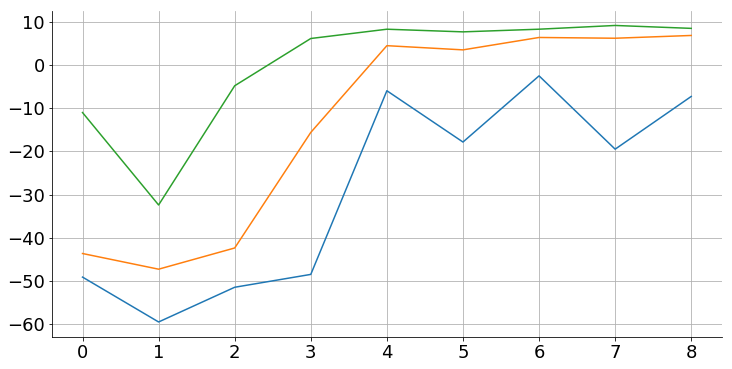

In [169]:
r = np.loadtxt('results/prosthetics-hist_len2-frame_skip2-relu-agents40-prio-n_step3_episode_rewards.txt')
plot_performance_(r, num_agents=40)

In [128]:
def plot_average(r, eta):
    ret = np.cumsum(r, dtype=np.float)
    ret[eta:] = ret[eta:] - ret[:-eta] 
    y = ret[eta - 1:] / eta
    return y

def plot_max(r, eta):
    return r[eta-1:]

def plot_means_and_stdevs(y, tau, x_scale=1, y_scale=1, figsize=(8, 5), 
                          color='dodgerblue', save=False):
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    y = np.array(y) * y_scale

    means = np.cumsum(y, dtype=np.float)
    stdevs = np.cumsum(np.square(y), dtype=np.float)
    
    means[tau:] = means[tau:] - means[:-tau]
    means = means[tau-1:] / tau
    
    stdevs[tau:] = stdevs[tau:] - stdevs[:-tau]
    stdevs = stdevs[tau-1:] / tau - np.square(means)
    stdevs = np.sqrt(stdevs)
    
    lower = means - stdevs
    upper = means + stdevs
    
    x = np.arange(means.size) / x_scale
    
    ax.plot(x, means, color=color)
    ax.fill_between(x, lower, means, alpha=0.2, where=lower <= means, facecolor=color)
    ax.fill_between(x, upper, means, alpha=0.2, where=upper >= means, facecolor=color)
    
    ax.set_xlabel("Number of episodes, "+r"$10^3$", fontsize=18)
    ax.set_ylabel("Reward", fontsize=18)
    
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(18)
    for (i, spine) in enumerate(plt.gca().spines.values()):
        if i%2 != 0: spine.set_visible(False)    
    ax.grid()
    
    if save:
        fig.savefig('results/prosthetics.png', dpi=300, bbox_inches='tight')
    
def plot_learning_curve(r, tau=100, figsize=(8, 5), x_scale=1000000, color='dodgerblue'):
    plot_means_and_stdevs(r, tau=tau, x_scale=x_scale, figsize=figsize, color=color)
    
def plot_compare(paths, eta, x_scale=1000000, figsize=(8, 5)):
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    r, f = [], []
    for i in range(len(paths)):
        r = np.load(paths[i] + "/learning_curve.npz")["r"]
        f = np.load(paths[i] + "/learning_curve.npz")["f"]/x_scale
        x = plot_max(f, eta)
        y = plot_average(r, eta)
        ax.plot(x, y, label=paths[i].split("/")[1])
        ax.legend()
    ax.grid()

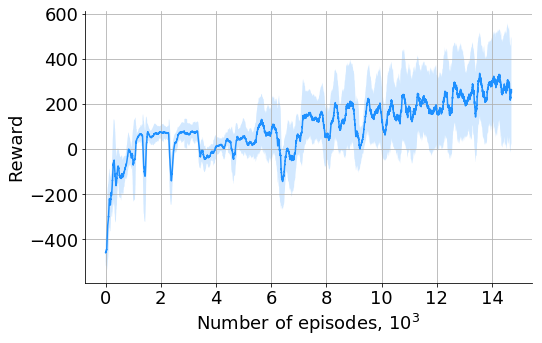

In [141]:
plot_means_and_stdevs([r[:,2]], tau=100, x_scale=1000, y_scale=10, save=False)

In [134]:
np.array(r[:,2])[4500:5000].mean()

2.2126537594210443

In [ ]:
np.array(r[:,2])[4500:5000].mean()

In [164]:
for i in range(3):
    print (np.array(r[:,2])[5000*(i+1)-500:5000*(i+1)].mean()*10)

22.126537594210443
175.8070687560128
246.22089451080268


In [163]:
len(r[:,2])

15001

In [162]:
r = np.loadtxt('results/prosthetics-hist_len2-frame_skip2-relu-agents40-prio_episode_rewards.txt')

In [165]:
r[:,2][-10:]

array([ 49.43690743,  36.22744044,  47.56408896,  -3.68232302,
        31.15063958,  45.95181313,  43.15337816, -10.07059317,
        42.18703166,   3.02249092])